### Pymaceuticals Skill Drill - Day 1

Congratulations, you are hired by Pymaceuticals Inc., one of the leading imaginary pharmaceutical companies that specializes in anti-cancer pharmaceuticals, to assist their senior scientist team in the effort to begin screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. You have been tasked by the senior scientist team to generate an initial drug regimens comparison and generate a summary of your findings. 

For this skill drill, you will walk through the steps of a basic analysis and visualize our dataset using a new type of visualization - a box and whisker plot. Although we have provided all of the steps required to produce each output, there may be some new concepts and/or terminology in this skill drill you may not have seen before. If you are ever stuck or confused, try googling some of the terms or check out the resource links we provide throughout the activity. You got this!

### Data Cleaning 

In [1]:
%matplotlib inline

In [88]:
# Import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the mouse data and the study results
mouse_df = pd.read_csv('../Resources/Mouse_metadata.csv')
study_df = pd.read_csv('../Resources/Study_results.csv')

In [4]:
# Display the mouse data
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Display the study data
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [70]:
# Combine the data into a single dataset and display it
combined_df = pd.merge(study_df, mouse_df, how="left", on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [74]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ids = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dupe_ids

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID and display it
clean_df=combined_df[combined_df["Mouse ID"].isin(dupe_ids)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


### Generating the Boxplot

In [79]:
# Determine the final timepoint for each mouse.

# Start by getting the greatest timepoint for each mouse
max_tp = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tp = max_tp.reset_index()
max_tp.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [80]:
# Join the newly created `.max()` dataframe to the dataframe from Part 1
merged_df = max_tp.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [85]:
# Create a list with all 10 drug regimens.
drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens
# Create a empty list to fill with the tumor vol data
tumor_l = list()

# Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in drug_regimens:
    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tum_vol = merged_df.loc[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    # Append the outcome to the empty list previously created.
    tumor_l.append(final_tum_vol)

[19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64, 8      49.783419
35     58.046569
39     62.175705
40     65.415955
46     60.233733
55     48.194578
60     45.000000
63     71.905117
67     69.872251
72     74.104086
74     45.000000
95     73.715619
105    50.659581
120    69.253503
122    73.901399
132    66.229606
136    78.567014
145    64.487812
147    75.294936
152    51.236606
191    66.268801
195    56.720095
199    63.189432
213    67.989530
234    62.909441
Name: Tumor Volume (mm3), dtype: float64, 16     74.997764
23     73.051363
47     63.105696
49     55.1389

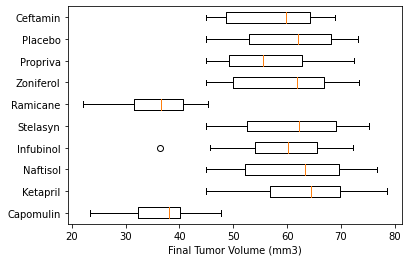

In [94]:
# Create a boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.

# Define a custom shape for all outliers in the visualization

# Create horizontal box and whisker plot
plt.boxplot(tumor_l, labels =drug_regimens, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.show()